In [1]:
%pylab inline
import pandas as pd
import matplotlib.ticker as mticker
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib notebook

In [3]:
# HER
ex = 4.43274E-09 
bx = 0.05997855
gx = 16.67262766

ey = 5.54513E-13
by = 0.00099678
gy = 1003.22875234

In [4]:
x0 = sqrt(ex*bx)
y0 = sqrt(ey*by)

In [5]:
x0*40

0.0006522199846395385

In [6]:
y0*5

1.1755078350866065e-07

# Rot
ex = 4.88967E-09 
bx = 0.05998618
gx = 16.67050800

ey = 3.96631E-12
by = 0.00101768
gy = 982.75614185

# Rota
ex = 4.88967E-09*1
bx = 0.06000125 
gx = 16.66632027  

ey = 3.96631E-12*1
by = 0.00099467
gy = 1005.36668151 

# lrot
ex = 4.69578e-09
bx = 0.06000348
gx = 16.66569901

ey = 1.33800E-12
by = 0.00100027
gy = 999.73314552

# rrot
ex = 4.63084e-09
bx = 0.06000219     
gx = 16.66605770  

ey = 3.26913e-12
by = 0.00099858
gy = 1001.42149341

# rot
ex = 4.88964e-09
bx = 0.06000001         
gx = 16.66666296   

ey = 4.01656e-12
by = 0.00100333
gy = 996.69116680

# NRot
ex = 4.95509E-09
bx = 0.06000033     
gx = 16.66657387  

ey = 2.11807E-12
by = 0.00099769
gy = 1002.31736421

In [7]:
x0 = sqrt(ex*bx)
y0 = sqrt(ey*by)
xp0 = sqrt(ex/bx)
yp0 = sqrt(ey/by)

In [8]:
x0

1.6305499615988464e-05

In [9]:
y0

2.3510156701732128e-08

In [10]:
xp0

0.00027185551527985366

In [11]:
yp0

2.3586103956471968e-05

In [12]:
def L(x,k,b):
    return k*x+b

In [13]:
def lfit(x,y):
    
    para, unc = curve_fit(L,x,y,p0=[1, 0.0166],maxfev=100000000)    
    Z=array(L(x,*para))
    slope= f'{para[0]:.3}'
    intersect=f'{para[1]:.3}'
    return Z, slope, intersect

In [14]:
def readf(file):
    df = pd.read_fwf(file)
    arr = df.to_numpy()
    return arr

In [15]:
def collector(arr):
    n = arr[0,1]
    arr = arr.astype('object')
    t = append('turn', arr[:,0])
    p = append('polarization', arr[:,3])
    x = append('x',arr[:,13])
    px = append('px',arr[:,14])
    y = append('y',arr[:,15])
    py = append('py',arr[:,16])
    z = append('z',arr[:,17])
    pz = append('pz',arr[:,18])

    return n, t, p, x, px, y, py, z, pz

In [16]:
def DF(file):
    
    df = pd.read_fwf(file)
    pd.set_option('display.max_column', None)
    #pd.set_option('display.max_rows', None)
    display(df)

In [17]:
def deci2d(x,y):
    
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(g))
    
    g = lambda y,pos : "${}$".format(f._formatSciNotation('%1.10e' % y))
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))

In [18]:
def mc(x):
    
    if x[0] == 'x' or x[0] == 'px':
        alpha = alpha_x
        
    elif x[0] == 'y' or x[0] == 'py':
        alpha = alpha_y
        
    elif x[0] == 'z' or x[0] == 'pz':
        alpha = alpha_z
        
    else:
        alpha =0
        
    A = mean(x[1:])
    
    B = 0.5*(max(x[1:]) - min(x[1:]))
    
    return A, B, alpha

In [19]:
def expop(t,A,B,alpha):
        
    pde = A+B*e**(-alpha*t)
    mde = A-B*e**(-alpha*t)
    
    plot(t , pde, 'r--', label = 'damping boundary')
    plot(t , mde, 'r--')

In [20]:
def ellipse(file, x,y):
    
    if x[0] == 'turn':
     
        figure(figsize=(10, 8))
        A, B, alpha = mc(y)
            
        print('the equilibrium of %s is: %s'%(y[0],A))
            
        plot(x[2:],y[2:],'.', color = 'gold')
        plot(x[1],y[1],'o', color = 'blue',label = 'initial position')
            
        if 'rd_' in file:
            expop(x[1:], A,B,alpha)
                
        else:
            pass
                
        xlabel('%s'%x[0],size =20)
        ylabel('%s'%y[0],size =20)
        title(r' %s vs %s ($\alpha_%s = %s \times 10^{-4} $)'\
              %(y[0],x[0], y[0][-1],round((alpha*10**4),3)),size =25)
            
        deci2d(x[1:],y[1:])
        legend(loc = 'best', fontsize =15)
        show()
        
    else:
        figure(figsize=(10, 8))

        plot(x[2:],y[2:],'.', color = 'gold')
        plot(x[1],y[1],'o', color = 'red', label = 'initial position')

        xlabel('%s (m)'%x[0],size =20)
        ylabel('%s'%y[0],size =20)
        title(' %s vs %s'%(y[0],x[0]),size = 20)
        deci2d(x[1:],y[1:])
        legend(loc = 'best', fontsize =15)
        show()

In [21]:
def ppor(n,x,y):
    
        if n>1:
            Z = lfit(x[1:],y[1:])

            figure(figsize=(12, 10))
            plot(x[1:],y[1:],'.', color = 'gold')
            plot(x[1:],Z[0], 'r-', label = 'fit')

            xlabel('%s'%x[0],size =20)
            ylabel('%s'%y[0],size =20)
            title(' %s vs %s '%(y[0],x[0]),size =25) 
            deci2d(x[1:],y[1:])
        
            text(x[int(len(x[1:])/5)],y[int(len(y[1:])/1.1)],\
             r' P = %s $t$ + %s' % (Z[1],Z[2]), size = 20)
            legend(loc = 'best', fontsize =20)
            show()
        else:
            pass

In [22]:
def tp(file):
    arr = readf(file)
    n, t, p, x, px, y, py, z, pz = collector(arr)
    ppor(n,t,p)
    ellipse(file, t,x)
    ellipse(file, t,px)
    ellipse(file, t,y)
    ellipse(file, t,py)
    ellipse(file, t,z)
    ellipse(file, t,pz)
    ellipse(file, x,y)
    ellipse(file, x,px)
    ellipse(file, y,py)
    ellipse(file, z,pz)



# The horizontal damping constant  : $\alpha_x = 1.75794\times 10^{-4} $

# The vertical damping constant  : $\alpha_y = 1.79553\times 10^{-4} $

# The longitudinal damping constant  : $\alpha_z = 3.59104\times 10^{-4} $


In [23]:
alpha_x = 1.75794e-04
alpha_y = 1.79553e-04
alpha_z = 3.59104e-04

In [24]:
DF('test7.txt')

,Turn,N_live,Time,Polarization,<Sx>,<Sy>,<Sz>,Sig_x,Sig_px,Sig_y,Sig_py,Sig_z,Sig_pz,<x>,<px>,<y>,<py>,<z>,<pz>,<p0c>,emit_a,emit_b,emit_c
0,0,100,3.942033e-27,1.000000,0.000000,1.000000,0.000000,0.000017,0.000269,2.398999e-08,0.000024,0.005112,0.000642,0.000016,8.421750e-07,2.477394e-08,-4.705896e-07,0.016594,-0.000052,7.007290e+09,4.440610e-09,5.653670e-13,0.000003
1,1,100,3.942033e-27,1.000000,-0.001897,0.999997,0.001121,0.000017,0.000267,2.555469e-08,0.000023,0.005100,0.000643,-0.000016,4.835369e-05,-1.827982e-08,1.151875e-05,0.016593,-0.000050,7.007290e+09,4.417694e-09,5.722229e-13,0.000003
2,2,100,3.942033e-27,1.000000,-0.002642,0.999989,0.003873,0.000017,0.000268,2.591336e-08,0.000023,0.005090,0.000640,0.000015,-1.028206e-04,1.391218e-08,-2.036446e-05,0.016591,-0.000051,7.007290e+09,4.416789e-09,5.765339e-13,0.000003
3,3,100,3.942033e-27,1.000000,-0.002028,0.999984,0.005291,0.000017,0.000267,2.490935e-08,0.000024,0.005078,0.000643,-0.000013,1.446836e-04,3.621718e-09,2.231991e-05,0.016589,-0.000047,7.007290e+09,4.402574e-09,5.780497e-13,0.000003
4,4,100,3.942033e-27,0.999999,-0.000281,0.999971,0.007489,0.000017,0.000267,2.377342e-08,0.000025,0.005068,0.000644,0.000011,-1.876228e-04,-1.031422e-08,-1.894830e-05,0.016583,-0.000046,7.007290e+09,4.409979e-09,5.779303e-13,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,100,3.942033e-27,0.999993,0.001378,0.999969,0.006820,0.000015,0.000258,5.549410e-08,0.000033,0.004821,0.000701,0.000001,3.178588e-05,9.931560e-09,-3.264592e-06,0.017030,-0.000035,7.007290e+09,3.857645e-09,1.726700e-12,0.000003
19997,19997,100,3.942033e-27,0.999993,0.003119,0.999971,0.005992,0.000015,0.000257,5.225179e-08,0.000037,0.004827,0.000704,-0.000002,-3.036913e-05,-4.187339e-09,6.539370e-06,0.017001,-0.000027,7.007290e+09,3.882925e-09,1.733715e-12,0.000003
19998,19998,100,3.942033e-27,0.999993,0.004147,0.999973,0.004687,0.000016,0.000253,4.353552e-08,0.000048,0.004880,0.000699,0.000002,1.915613e-05,2.079315e-09,-8.924097e-06,0.016961,-0.000019,7.007290e+09,3.851016e-09,1.747260e-12,0.000003
19999,19999,100,3.942033e-27,0.999993,0.004084,0.999981,0.002561,0.000016,0.000252,3.459387e-08,0.000053,0.004978,0.000693,-0.000002,-1.598775e-05,4.810919e-09,7.585920e-06,0.016910,-0.000010,7.007290e+09,3.903797e-09,1.721217e-12,0.000003


<IPython.core.display.Javascript object>


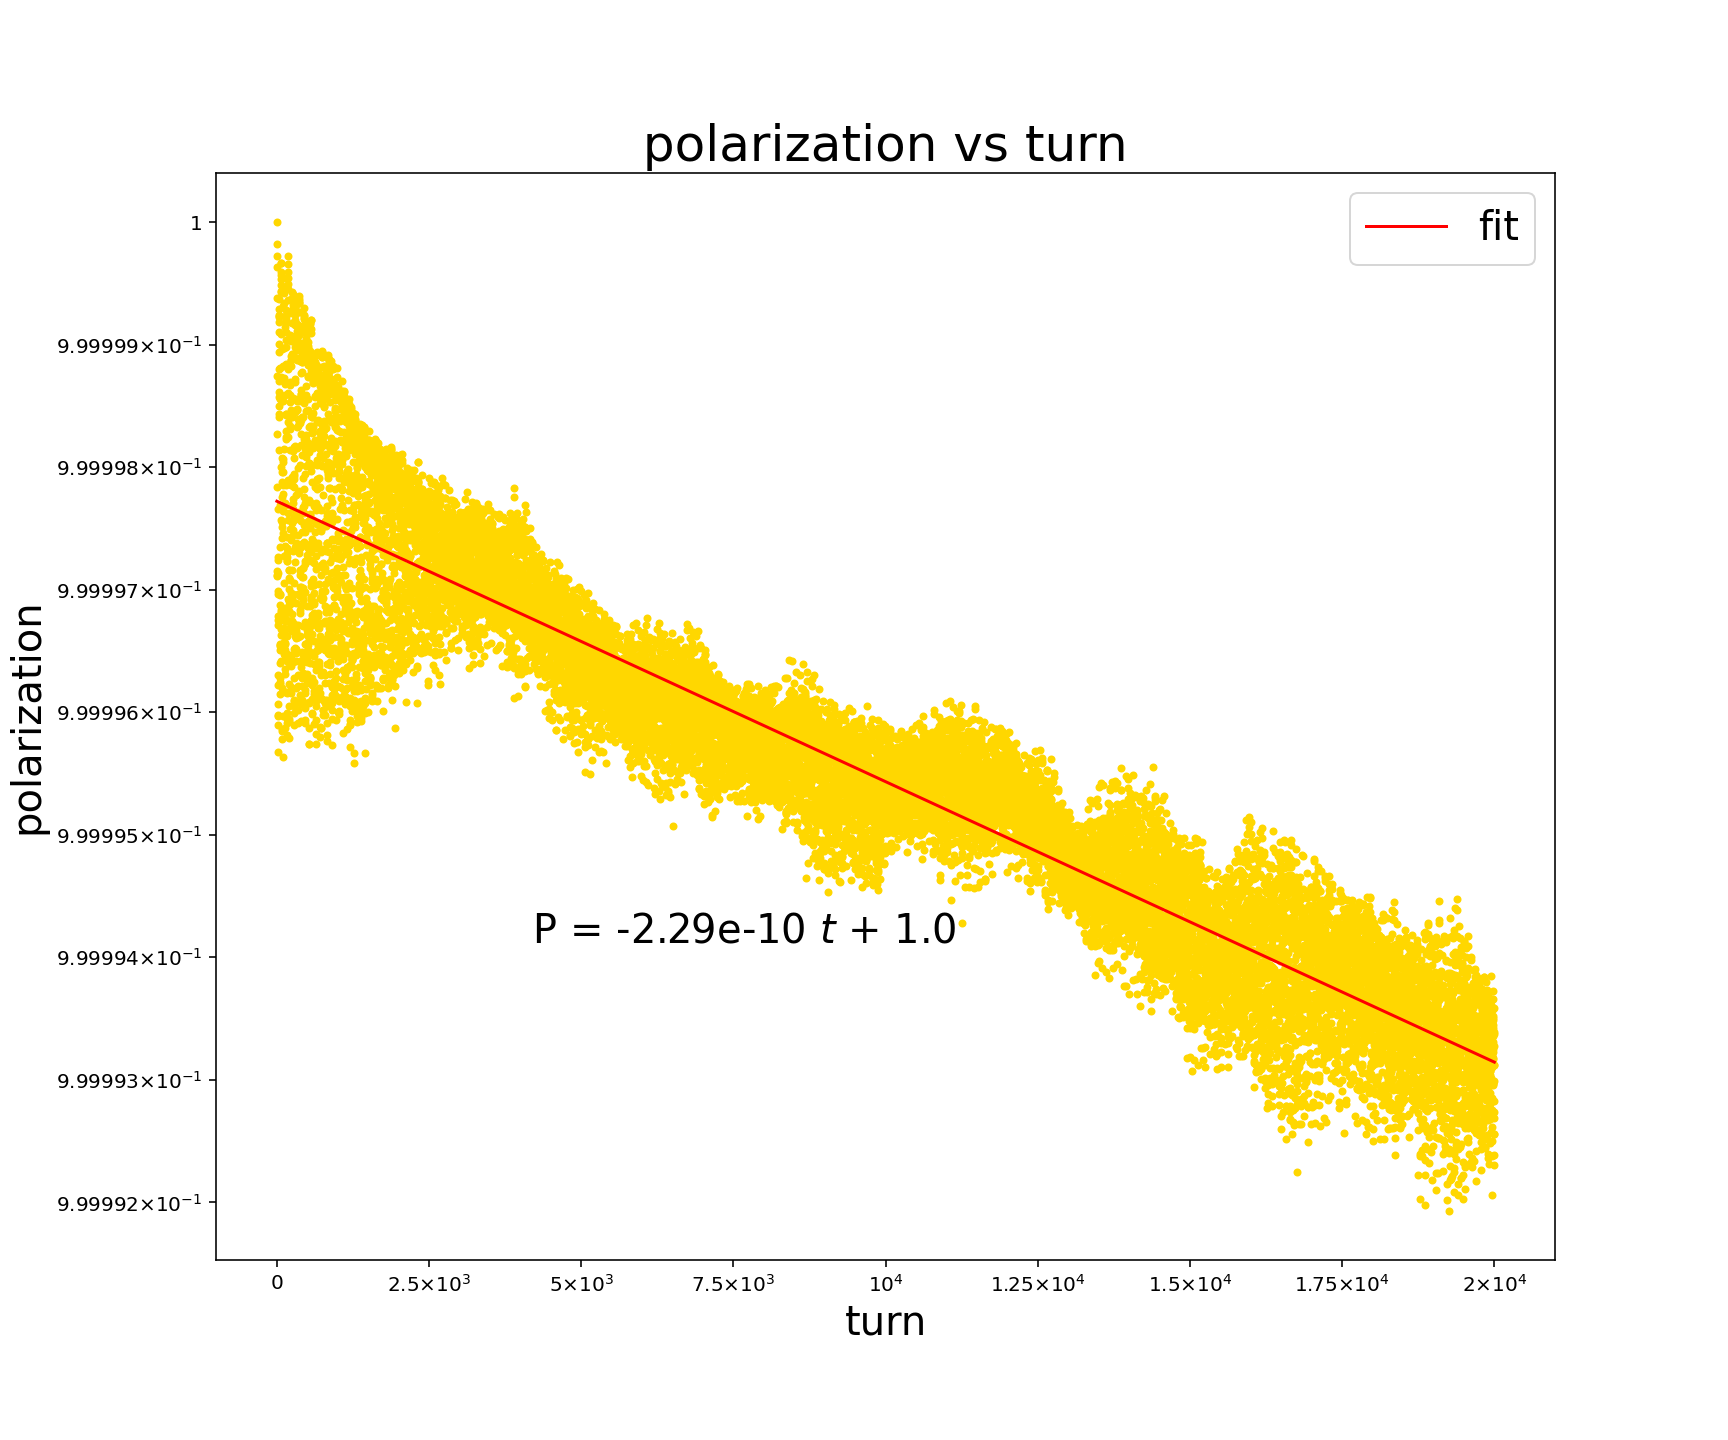

<IPython.core.display.Javascript object>


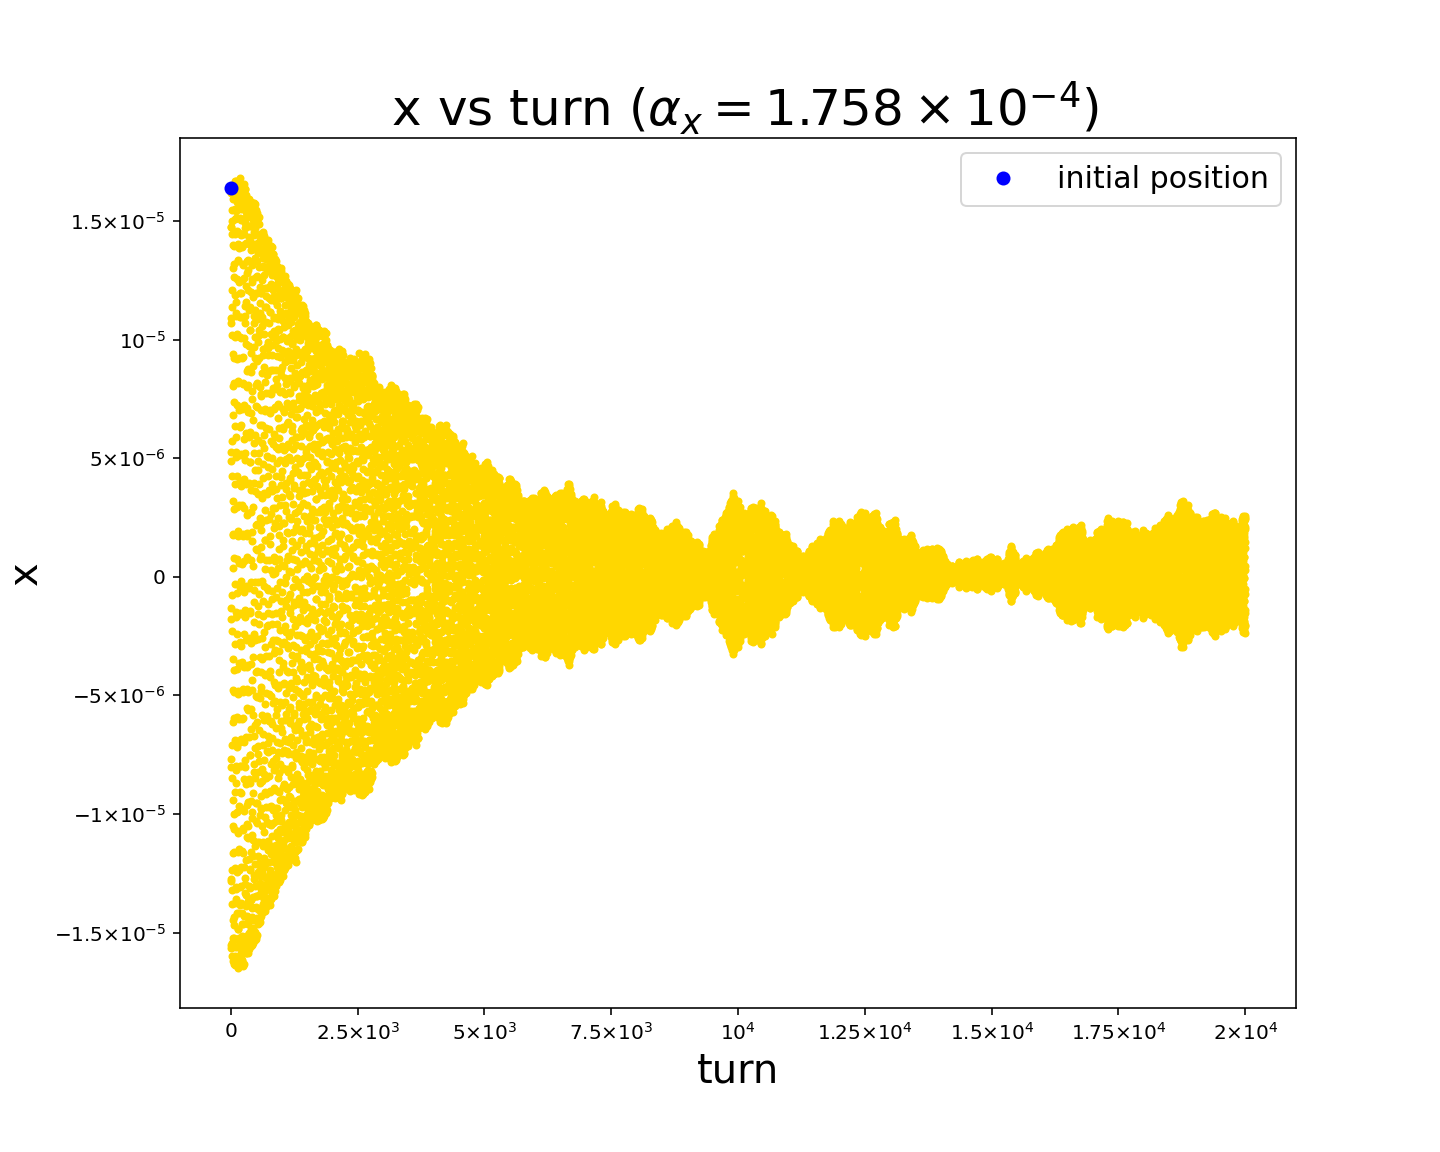

the equilibrium of x is: 1.2246668776762208e-07


<IPython.core.display.Javascript object>


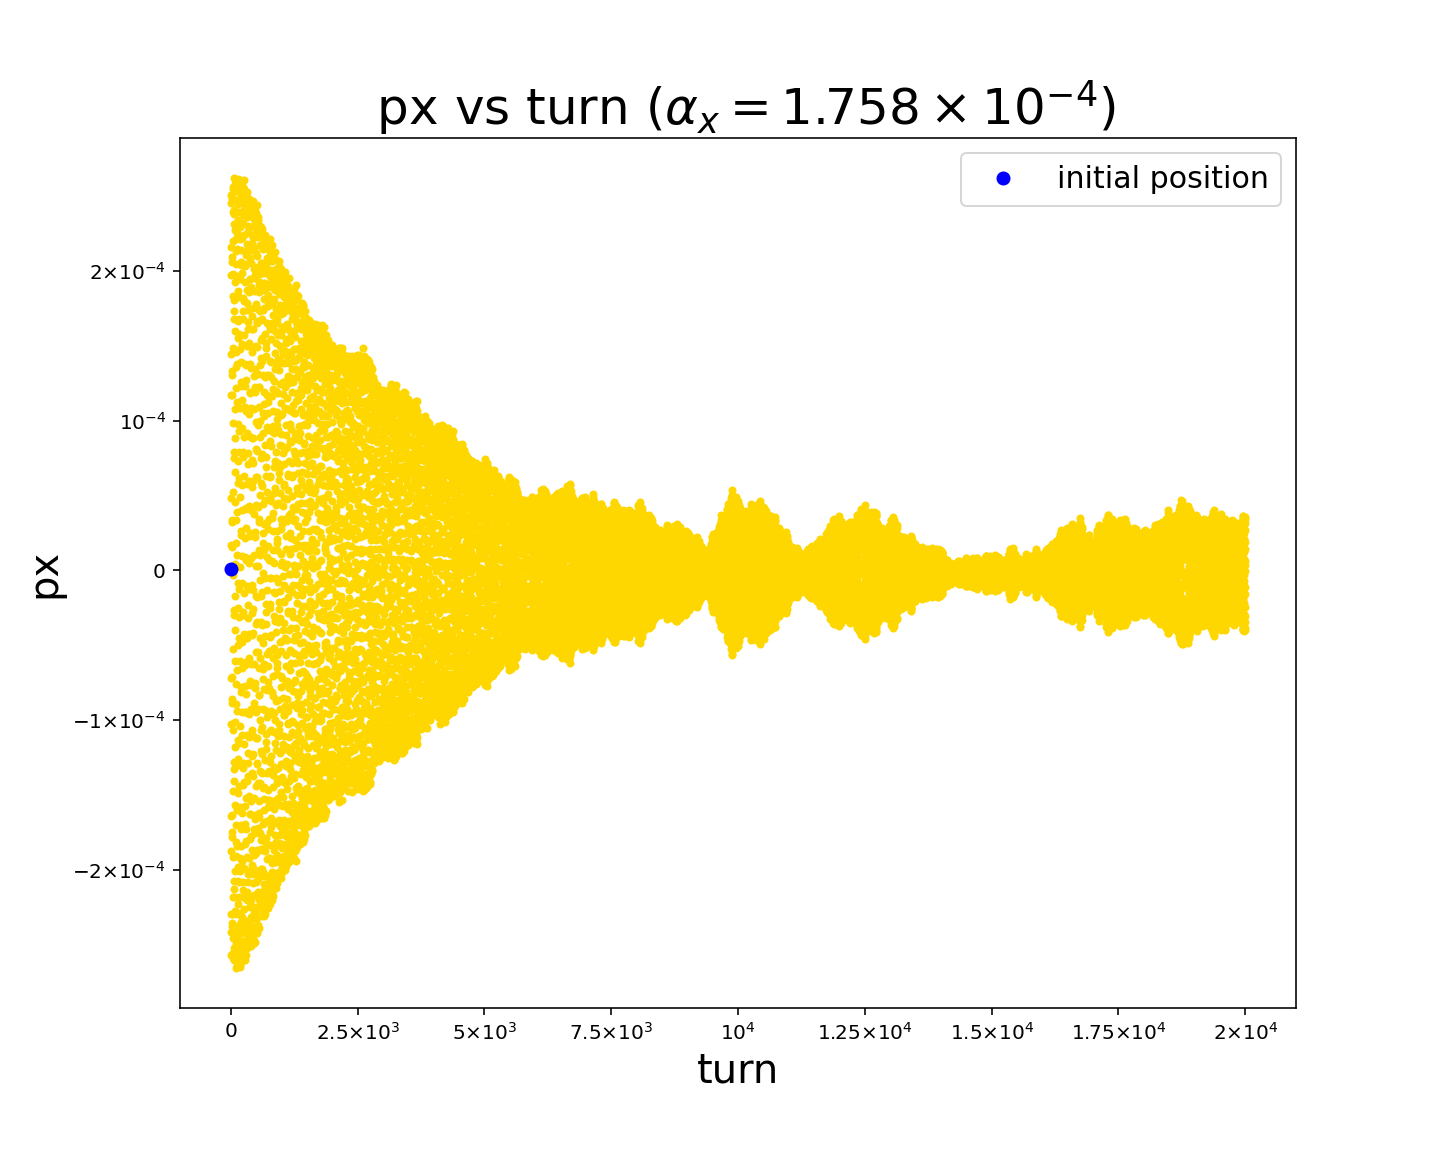

the equilibrium of px is: -1.5421197541853961e-06


<IPython.core.display.Javascript object>


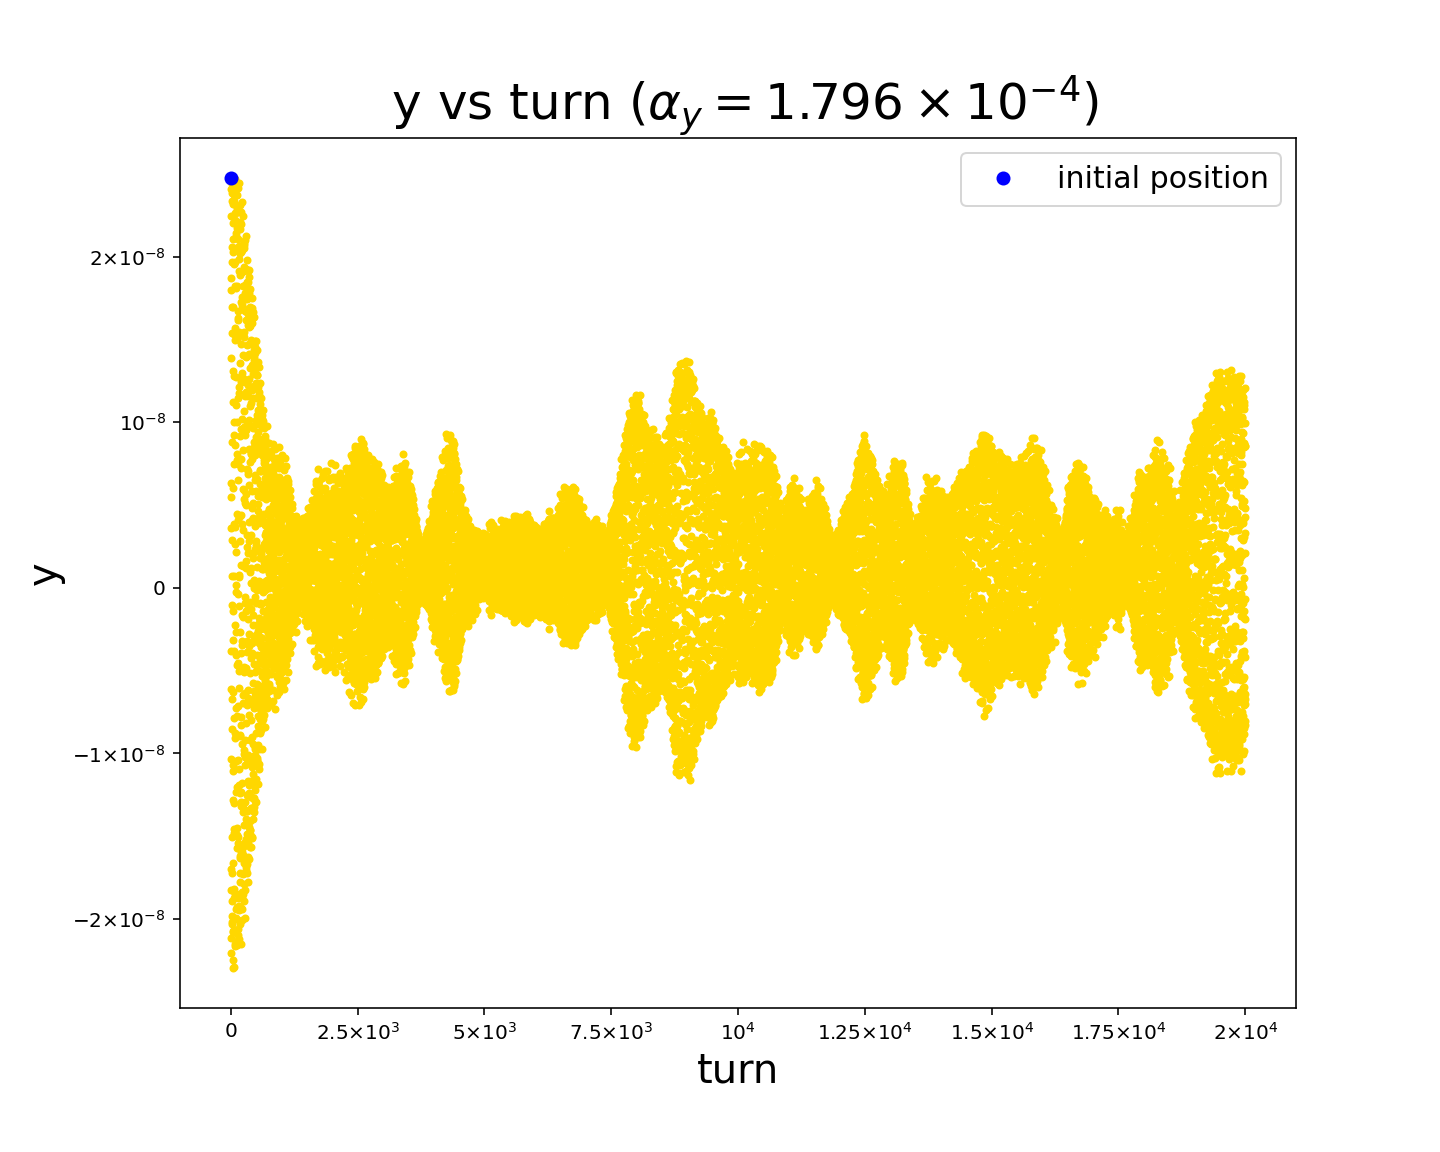

the equilibrium of y is: 1.1709602139053426e-09


<IPython.core.display.Javascript object>


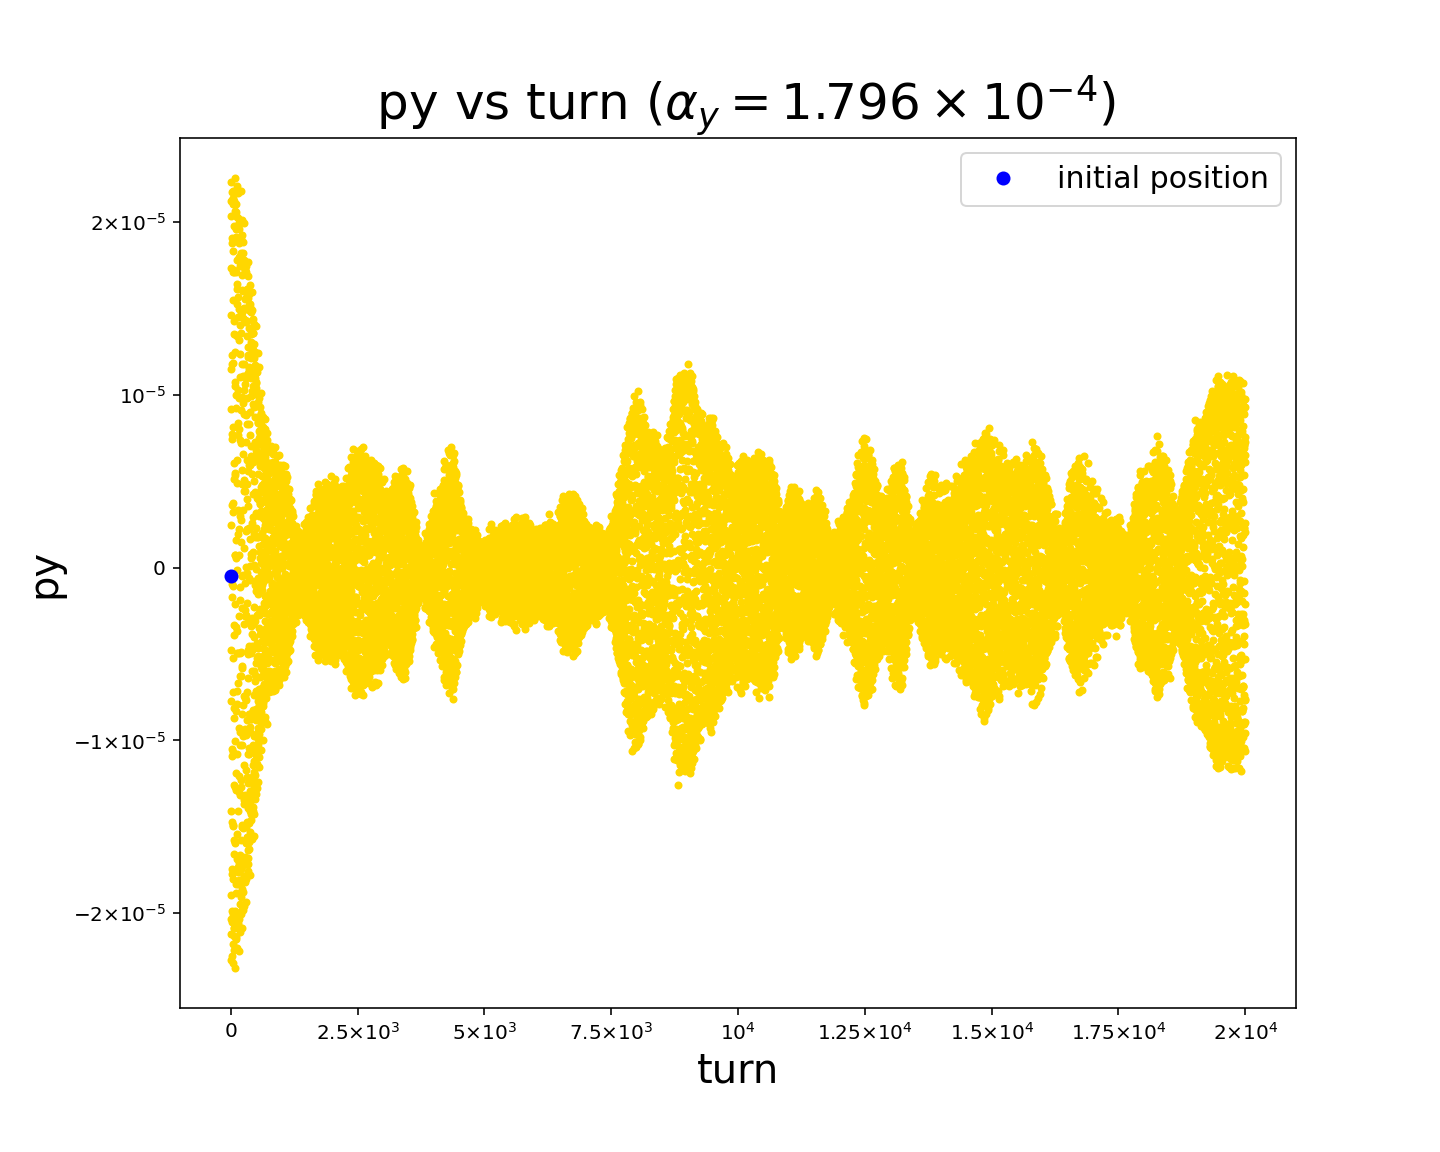

the equilibrium of py is: -2.8873085001349835e-07


<IPython.core.display.Javascript object>


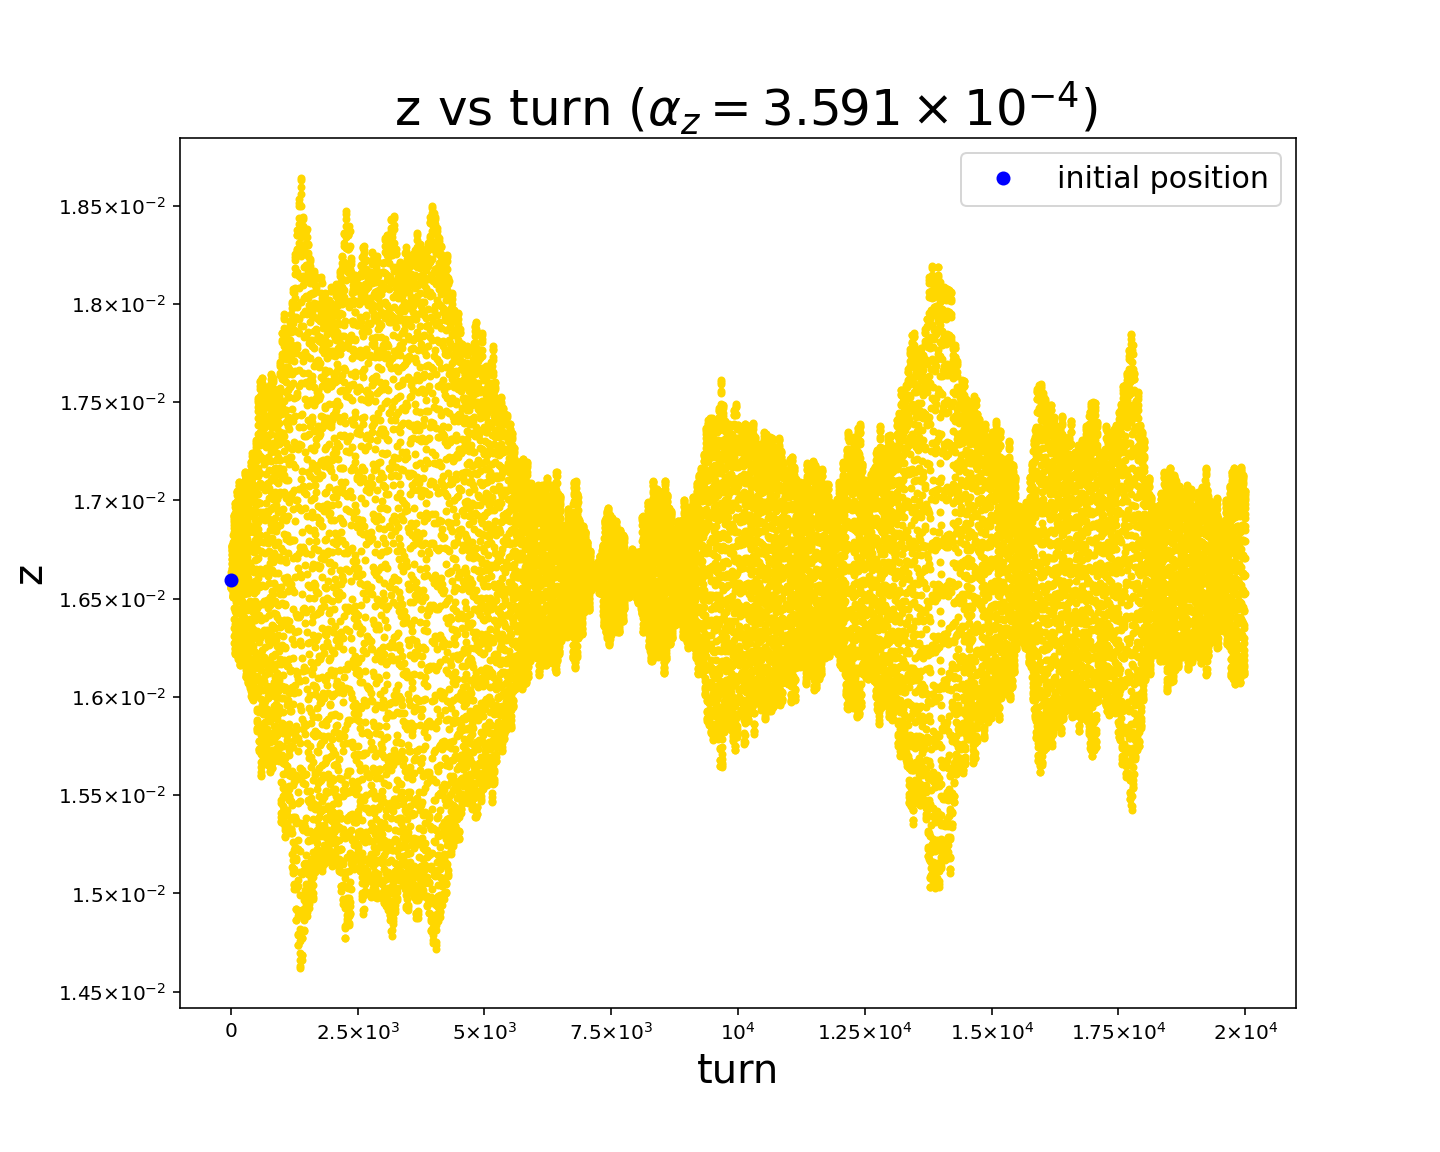

the equilibrium of z is: 0.016619289932003435


<IPython.core.display.Javascript object>

the equilibrium of pz is: -5.146230425506819e-05


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
tp('test7.txt')

In [ ]:
tp('r_her.txt')